In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

In [2]:
run_type="naive_sum"
num_it = "250"
datetime = "15-Aug-2022-(23:23:38)"

dirname = "../run_" + run_type + "_" + num_it + "_" + datetime

In [3]:
run_type="shield_sum"
num_it = "250"
datetime = "15-Aug-2022-(23:35:43)"

dirnamea = "../run_" + run_type + "_" + num_it + "_" + datetime

In [5]:
ret = np.load(dirname + '/eval.npy', allow_pickle=True)
avgrets = []
avglengths = []
avgsums = []
maxtile = []
for r in ret:
    avgrets.append(r[0])
    avglengths.append(r[1])
    avgsums.append(r[2])
    maxtile.append(r[3])

loss = np.load(dirname + '/losses.npy')

In [6]:
ret = np.load(dirnamea + '/eval.npy', allow_pickle=True)
avgrets1 = []
avglengths1 = []
avgsums1 = []
maxtile1 = []
for r in ret:
    avgrets1.append(r[0])
    avglengths1.append(r[1])
    avgsums1.append(r[2])
    maxtile1.append(r[3])

loss1 = np.load(dirname + '/losses.npy')

[Text(0, 0, '0'),
 Text(1, 0, '25'),
 Text(2, 0, '50'),
 Text(3, 0, '75'),
 Text(4, 0, '100'),
 Text(5, 0, '125'),
 Text(6, 0, '150'),
 Text(7, 0, '175'),
 Text(8, 0, '200'),
 Text(9, 0, '225'),
 Text(10, 0, '250')]

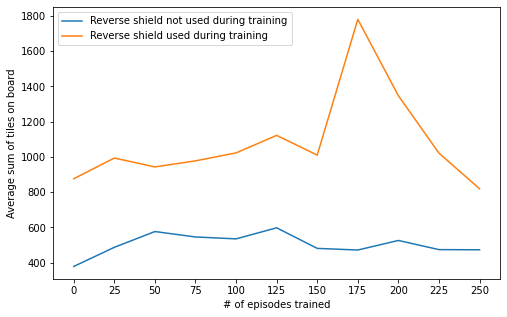

In [53]:
fig, ax1 = plt.subplots()
fig.set_size_inches(8,5)
plt.plot(avgsums, label="Reverse shield not used during training")
plt.plot(avgsums1, label="Reverse shield used during training")
plt.legend()
plt.xlabel("# of episodes trained")
plt.ylabel("Average sum of tiles on board")
ax1.set_xticks(range(0,11))
ax1.set_xticklabels(['0','25','50','75','100','125','150','175','200','225','250'])

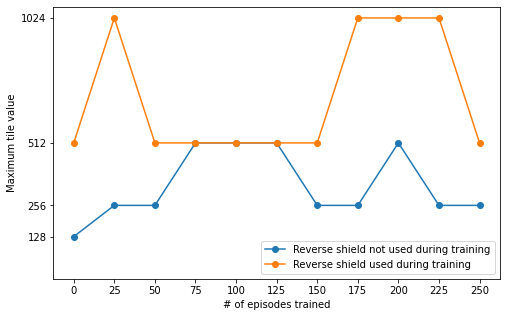

In [8]:
fig, ax1 = plt.subplots()
fig.set_size_inches(8,5)
x = np.arange(0, len(avglengths))
ax1.plot(x, maxtile, 'o-', label="Reverse shield not used during training")
ax1.plot(x, maxtile1, 'o-', label="Reverse shield used during training")

ax1.set_xlabel("# of episodes trained")
ax1.set_ylabel('Maximum tile value')

ax1.set_xticks(range(0,11))
ax1.set_xticklabels(['0','25','50','75','100','125','150','175','200','225','250'])
ax1.set_yticks([128,256,512,1024])

plot_margin = 128

x0, x1, y0, y1 = plt.axis()
plt.axis((x0,
          x1,
          y0 - plot_margin,
          y1))

plt.legend(loc='lower right')
plt.show()


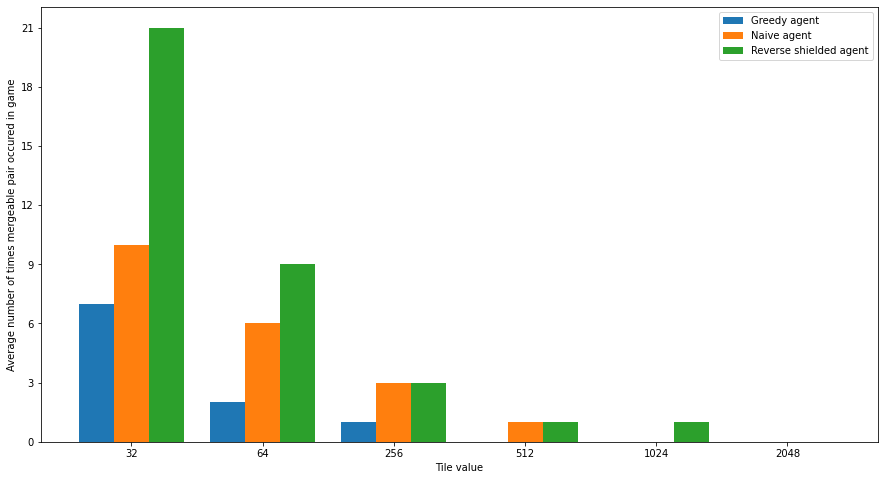

In [32]:
greedy = [7, 2, 1, 0, 0, 0]
naive = [10,  6,  3,  1,  0,  0]
shield = [21,  9,  3,  1,  1,  0]

fig,ax1 = plt.subplots()
fig.set_size_inches(15,8)

X = ['32','64','256','512','1024','2048']
X_axis = np.arange(len(X)) * 1.5
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))


plt.bar(X_axis, greedy, 0.4, label='Greedy agent')
plt.bar(X_axis + 0.4, naive, 0.4, label='Naive agent')
plt.bar(X_axis + 0.8, shield, 0.4, label='Reverse shielded agent')

plt.xticks(X_axis + 0.4,X)
plt.xlabel("Tile value")
plt.ylabel("Average number of times mergeable pair occured in game")
plt.legend()